In [ ]:
pip install tensorflow

In [1]:
!pip install opencv-python sklearn matplotlib mediapipe

In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as md
import time 
import os

# Keypoints using MP Holistic

In [ ]:
md_holistic = md.solutions.holistic  #Holistic model
md_drawing = md.solutions.drawing_utils #Drawing Utilites

In [ ]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                 #Image is no longer writeable
    results = model.process(image)                #Make prediction
    image.flags.writeable = True                  #Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#COLOR CONVERSION RGB 2 BGR
    return image,results

In [4]:
def mediapipe_drawing(image,results):
    md_drawing.draw_landmarks(image,results.face_landmarks, md_holistic.FACEMESH_TESSELATION,
                             md_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=1), 
                             md_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=1)
    )
    md_drawing.draw_landmarks(image,results.pose_landmarks,md_holistic.POSE_CONNECTIONS,
                             md_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             md_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    )
    md_drawing.draw_landmarks(image,results.left_hand_landmarks,md_holistic.HAND_CONNECTIONS,
                             md_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             md_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    )
    md_drawing.draw_landmarks(image,results.right_hand_landmarks,md_holistic.HAND_CONNECTIONS,
                             md_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             md_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    )

In [6]:
cap = cv2.VideoCapture(0)
with md_holistic.Holistic(min_detection_confidence=0.8,min_tracking_confidence=0.3) as holistic: 
    while cap.isOpened():
        rst,frame = cap.read()

        #Make Detection
        image, results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw Landmark
        mediapipe_drawing(image,results)

        cv2.imshow("OpenCv",image)

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
plt.subplot(1,3,1).imshow(frame) # BGR format
plt.subplot(1,3,2).imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
plt.subplot(1,3,3).imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)) #RGB format

In [ ]:
results.count

In [ ]:
results.face_landmarks

In [ ]:
results.pose_landmarks

In [ ]:
mediapipe_drawing(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [ ]:
len(results.pose_landmarks.landmark)

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
len(results.right_hand_landmarks.landmark)

In [ ]:
pose = []
for i in results.pose_landmarks.landmark:
    test = np.array([i.x,i.y,i.z,i.visibility])
    pose.append(test)

In [ ]:
pose

In [ ]:
right_hand = []
for r in results.right_hand_landmarks.landmark:
    test = np.array([r.x,r.y,r.z])
    right_hand.append(test)

In [ ]:
right_hand

In [ ]:
face = []
for f in results.face_landmarks.landmark:
    test = np.array([f.x,f.y,f.z])
    face.append(test)

In [ ]:
face

In [ ]:
left_hand = []
for l in results.left_hand_landmarks.landmark:
    test = np.array([l.x,l.y,l.z])
    left_hand.append(test)

In [ ]:
left_hand

### Run

In [8]:
def extract_keypoints(results):
    pose = np.array([[i.x,i.y,i.z,i.visibility] for i in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(1404)
    face = np.array([[i.x,i.y,i.z] for i in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[i.x,i.y,i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[i.x,i.y,i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

In [ ]:
np.save('0',result_test)

In [ ]:
np.load('0.npy')

# Setup Folder for Collection

In [9]:
Data_Path = os.path.join('Hand_Sign_Recognisition_Data_new')

actions = np.array(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday"])

no_sequence = 30

sequence_length = 30

strt_folder = 30

In [10]:
for action in actions:
    for sequence in range(1,no_sequence+1):
        try:
             os.makedirs(os.path.join(Data_Path, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
with md_holistic.Holistic(min_detection_confidence=0.8,min_tracking_confidence=0.3) as holistic: 
        for action in actions:
            for sequence in range(1,no_sequence+1):
                for frame_num in range(1,sequence_length+1):
                    rst,frame = cap.read()
                    
                    image,results = mediapipe_detection(frame,holistic)
                    
                    mediapipe_drawing(image,results)
                    
                    if frame_num == 1:
                        cv2.putText(image,'STARTING COLLECTION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        #cv2.imshow("Open Feed",image)
                        cv2.waitKey(2000)
                    elif frame_num == 30:
                        cv2.putText(image,'ENDING COLLECTION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                        
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(Data_Path, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    key = cv2.waitKey(10)
                    if key == ord("p"):
                        cv2.waitKey(-1)
        cap.release()
        cv2.destroyAllWindows()

In [13]:
cap.release()
cv2.destroyAllWindows()

Single Value Dataset Create

In [8]:
actions
lst = enumerate(actions)
print(list(lst))

[(0, 'Sunday'), (1, 'Monday'), (2, 'Tuesday'), (3, 'Wednesday'), (4, 'Thursday'), (5, 'Friday'), (6, 'Saturday')]


In [13]:
cap = cv2.VideoCapture(0)
with md_holistic.Holistic(min_detection_confidence=0.8,min_tracking_confidence=0.3) as holistic: 
        for action in range(1):
            for sequence in range(1,no_sequence+1):
                for frame_num in range(1,sequence_length+1):
                    rst,frame = cap.read()
                    
                    image,results = mediapipe_detection(frame,holistic)
                    
                    mediapipe_drawing(image,results)
                    
                    if frame_num == 1:
                        cv2.putText(image,'STARTING COLLECTION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(actions[0], sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        #cv2.imshow("Open Feed",image)
                        cv2.waitKey(2000)
                    elif frame_num == 30:
                        cv2.putText(image,'ENDING COLLECTION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(actions[0], sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(actions[0], sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(Data_Path, actions[0], str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                        

                    key = cv2.waitKey(10)
                    if key == ord("p"):
                        cv2.waitKey(-1) 
        cap.release()
        cv2.destroyAllWindows()

In [14]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num,label in enumerate(actions)}

In [10]:
label_map

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [11]:
sequences,labels = [],[]
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(Data_Path,action))).astype(int):
        window = []
        for frame_num in range(1,sequence_length+1):
            res = np.load(os.path.join(Data_Path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
sequences

[[array([ 0.49192095,  0.4500109 , -0.89879167, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50558424,  0.43938059, -1.04982555, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51108718,  0.43442282, -1.10598016, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.513412  ,  0.4323456 , -1.22313154, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51651573,  0.43048987, -1.27228069, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51907957,  0.43003553, -1.43655169, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52096498,  0.43009371, -1.30883527, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52153742,  0.43014228, -1.37193847, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52171695,  0.43023208, -1.48389649, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52169383,  0.43041527, -1.47781944, ...,  0.        ,
       

In [13]:
np.array(sequences).ndim

3

In [14]:
print(len(sequences), type(sequences))
print(len(sequences[0]), type(sequences[0]))
print(len(sequences[0][0]), type(sequences[0][0]), sequences[0][0])

210 <class 'list'>
30 <class 'list'>
1662 <class 'numpy.ndarray'> [ 0.49192095  0.4500109  -0.89879167 ...  0.          0.
  0.        ]


In [15]:
np.array(sequences).shape

(210, 30, 1662)

In [16]:
np.array(labels).shape

(210,)

In [17]:
X = np.array(sequences)

In [18]:
print(len(X[0][0]), type(X[0][0]), X[0][0])

1662 <class 'numpy.ndarray'> [ 0.49192095  0.4500109  -0.89879167 ...  0.          0.
  0.        ]


In [19]:
X.shape

(210, 30, 1662)

In [20]:
y = to_categorical(labels).astype(int)

In [21]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [22]:
np.array(y).shape

(210, 7)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [24]:
y_test.shape

(21, 7)

In [25]:
y_test

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

# Build and Train LSTM Neural Network

In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [27]:
log_dir = os.path.join('Logs_New_Day')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential([
    LSTM(64, return_sequences=True, activation='relu',input_shape = (30,1662)),
    LSTM(128, return_sequences=True, activation='relu'),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(actions.shape[0], activation='softmax'),
])

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [30]:
models = model.fit(X_train, y_train,validation_split=0.1, epochs=500, callbacks=[tb_callback])

Epoch 1/500
6/6 [==============================] - 10s 418ms/step - loss: 2.4985 - categorical_accuracy: 0.1412 - val_loss: 1.9240 - val_categorical_accuracy: 0.1053
Epoch 2/500
6/6 [==============================] - 1s 150ms/step - loss: 2.5453 - categorical_accuracy: 0.1235 - val_loss: 1.8684 - val_categorical_accuracy: 0.2105
Epoch 3/500
6/6 [==============================] - 1s 143ms/step - loss: 2.0023 - categorical_accuracy: 0.1000 - val_loss: 1.9146 - val_categorical_accuracy: 0.1053
Epoch 4/500
6/6 [==============================] - 1s 146ms/step - loss: 1.9885 - categorical_accuracy: 0.1588 - val_loss: 1.9020 - val_categorical_accuracy: 0.2105
Epoch 5/500
6/6 [==============================] - 1s 188ms/step - loss: 1.9455 - categorical_accuracy: 0.1412 - val_loss: 2.0160 - val_categorical_accuracy: 0.1053
Epoch 6/500
6/6 [==============================] - 1s 132ms/step - loss: 1.9880 - categorical_accuracy: 0.1882 - val_loss: 1.9694 - val_categorical_accuracy: 0.0000e+00
Epoch

6/6 [==============================] - 1s 146ms/step - loss: 1.9438 - categorical_accuracy: 0.1529 - val_loss: 1.9682 - val_categorical_accuracy: 0.0526
Epoch 51/500
6/6 [==============================] - 1s 146ms/step - loss: 1.9438 - categorical_accuracy: 0.1529 - val_loss: 1.9635 - val_categorical_accuracy: 0.0526
Epoch 52/500
6/6 [==============================] - 1s 145ms/step - loss: 1.9433 - categorical_accuracy: 0.1529 - val_loss: 1.9707 - val_categorical_accuracy: 0.0526
Epoch 53/500
6/6 [==============================] - 1s 141ms/step - loss: 1.9432 - categorical_accuracy: 0.1529 - val_loss: 1.9750 - val_categorical_accuracy: 0.0526
Epoch 54/500
6/6 [==============================] - 1s 143ms/step - loss: 1.9415 - categorical_accuracy: 0.1529 - val_loss: 1.9715 - val_categorical_accuracy: 0.0526
Epoch 55/500
6/6 [==============================] - 1s 136ms/step - loss: 1.9413 - categorical_accuracy: 0.1529 - val_loss: 1.9647 - val_categorical_accuracy: 0.0526
Epoch 56/500
6/6 

6/6 [==============================] - 1s 145ms/step - loss: 1.9414 - categorical_accuracy: 0.1588 - val_loss: 1.9757 - val_categorical_accuracy: 0.1053
Epoch 149/500
6/6 [==============================] - 1s 176ms/step - loss: 1.9413 - categorical_accuracy: 0.1471 - val_loss: 1.9743 - val_categorical_accuracy: 0.1053
Epoch 150/500
6/6 [==============================] - 1s 149ms/step - loss: 1.9413 - categorical_accuracy: 0.1529 - val_loss: 1.9750 - val_categorical_accuracy: 0.1053
Epoch 151/500
6/6 [==============================] - 1s 164ms/step - loss: 1.9412 - categorical_accuracy: 0.1529 - val_loss: 1.9744 - val_categorical_accuracy: 0.1053
Epoch 152/500
6/6 [==============================] - 1s 149ms/step - loss: 1.9413 - categorical_accuracy: 0.1529 - val_loss: 1.9749 - val_categorical_accuracy: 0.1053
Epoch 153/500
6/6 [==============================] - 1s 147ms/step - loss: 1.9409 - categorical_accuracy: 0.1529 - val_loss: 1.9760 - val_categorical_accuracy: 0.1053
Epoch 154/50

Epoch 246/500
6/6 [==============================] - 1s 145ms/step - loss: 1.9437 - categorical_accuracy: 0.1529 - val_loss: 1.9718 - val_categorical_accuracy: 0.1053
Epoch 247/500
6/6 [==============================] - ETA: 0s - loss: 1.9436 - categorical_accuracy: 0.15 - 1s 154ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9720 - val_categorical_accuracy: 0.1053
Epoch 248/500
6/6 [==============================] - 1s 145ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9724 - val_categorical_accuracy: 0.1053
Epoch 249/500
6/6 [==============================] - 1s 143ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9725 - val_categorical_accuracy: 0.1053
Epoch 250/500
6/6 [==============================] - 1s 148ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9725 - val_categorical_accuracy: 0.1053
Epoch 251/500
6/6 [==============================] - 1s 150ms/step - loss: 1.9437 - categorical_accuracy: 0.152

Epoch 295/500
6/6 [==============================] - 1s 129ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9728 - val_categorical_accuracy: 0.1053
Epoch 296/500
6/6 [==============================] - 1s 134ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9729 - val_categorical_accuracy: 0.1053
Epoch 297/500
6/6 [==============================] - 1s 131ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9736 - val_categorical_accuracy: 0.1053
Epoch 298/500
6/6 [==============================] - 1s 135ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9744 - val_categorical_accuracy: 0.1053
Epoch 299/500
6/6 [==============================] - 1s 129ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9748 - val_categorical_accuracy: 0.1053
Epoch 300/500
6/6 [==============================] - 1s 130ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9751 - val_categorical_accuracy: 0.105

6/6 [==============================] - 1s 130ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9752 - val_categorical_accuracy: 0.1053
Epoch 345/500
6/6 [==============================] - 1s 129ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9751 - val_categorical_accuracy: 0.1053
Epoch 346/500
6/6 [==============================] - 1s 128ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9750 - val_categorical_accuracy: 0.1053
Epoch 347/500
6/6 [==============================] - 1s 132ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9751 - val_categorical_accuracy: 0.1053
Epoch 348/500
6/6 [==============================] - 1s 138ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9752 - val_categorical_accuracy: 0.1053
Epoch 349/500
6/6 [==============================] - 1s 130ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9753 - val_categorical_accuracy: 0.1053
Epoch 350/50

6/6 [==============================] - 1s 128ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9809 - val_categorical_accuracy: 0.0526
Epoch 443/500
6/6 [==============================] - 1s 124ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9812 - val_categorical_accuracy: 0.0526
Epoch 444/500
6/6 [==============================] - 1s 147ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9812 - val_categorical_accuracy: 0.0526
Epoch 445/500
6/6 [==============================] - 1s 125ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9813 - val_categorical_accuracy: 0.0526
Epoch 446/500
6/6 [==============================] - 1s 128ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9814 - val_categorical_accuracy: 0.0526
Epoch 447/500
6/6 [==============================] - 1s 129ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9818 - val_categorical_accuracy: 0.0526
Epoch 448/50

# Graphical Comparision Between Training (Categorical Loss and accuracy ) and  Validation data

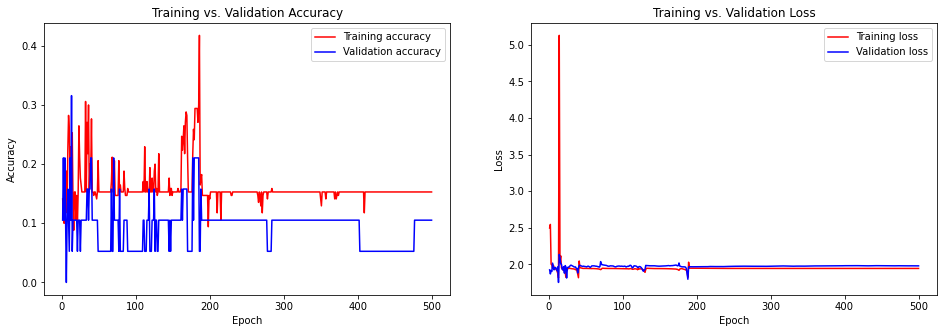

In [31]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
acc_model = models.history['categorical_accuracy']
acc_validaion = models.history['val_categorical_accuracy']
epochs = range(1,len(acc_model)+1)
plt.plot(epochs,acc_model,c='r',label = 'Training accuracy')
plt.plot(epochs,acc_validaion,c='b',label = 'Validation accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
acc_model_loss = models.history['loss']
acc_validaion_loss = models.history['val_loss']
epochs = range(1,len(acc_model_loss)+1)
plt.plot(epochs,acc_model_loss,c='r',label = 'Training loss')
plt.plot(epochs,acc_validaion_loss,c='b',label = 'Validation loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 596,807
Trainable params: 596,807
Non-trai

# Make Predictions

In [33]:
res = model.predict(X_test)

In [34]:
actions[np.argmax(res[5])]

'Sunday'

In [35]:
actions[np.argmax(y_test[5])]

'Thursday'

In [36]:
actions[np.argmax(res[9])]

'Sunday'

In [37]:
actions[np.argmax(y_test[9])]

'Friday'

# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,accuracy_score
import seaborn as sns
import random

In [39]:
res.size

147

In [40]:
y_test.size

147

In [41]:
test,prdict = [],[]
for i in range(0,len(res)):
    test.append(actions[np.argmax(y_test[i])])  
    prdict.append(actions[np.argmax(res[i])])

print(test)
print(prdict)

['Sunday', 'Friday', 'Saturday', 'Monday', 'Monday', 'Thursday', 'Friday', 'Thursday', 'Wednesday', 'Friday', 'Monday', 'Wednesday', 'Tuesday', 'Saturday', 'Thursday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday', 'Friday', 'Monday']
['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday']


In [42]:
test = np.array(test)
test.shape

(21,)

In [43]:
prdict = np.array(prdict)
prdict.shape

(21,)

In [44]:
con_mat = confusion_matrix(test,prdict,labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday"])
con_mat

array([[2, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [45]:
multilabel_confusion_matrix(test,prdict)

array([[[17,  0],
        [ 4,  0]],

       [[17,  0],
        [ 4,  0]],

       [[18,  0],
        [ 3,  0]],

       [[ 0, 19],
        [ 0,  2]],

       [[18,  0],
        [ 3,  0]],

       [[19,  0],
        [ 2,  0]],

       [[18,  0],
        [ 3,  0]]], dtype=int64)

In [46]:
print(round(100*accuracy_score(test,prdict),2),"%")

9.52 %


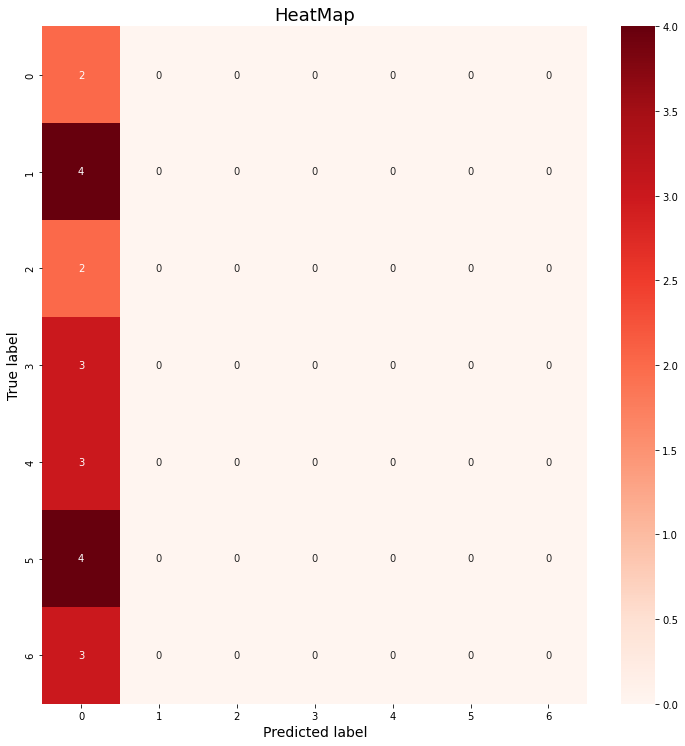

In [47]:
#Heat map of confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,cmap=plt.cm.Reds)
plt.tight_layout()
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)
plt.title("HeatMap",fontsize=18)
plt.show()

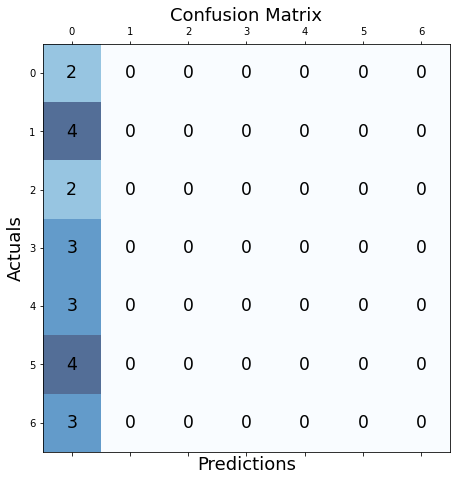

In [48]:
#Confusion matrix in graphical Format

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(con_mat, cmap=plt.cm.Blues, alpha=0.7)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        ax.text(x=j, y=i,s=con_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Save Model and Weights 

In [ ]:
model.save("hand_gesture_actions.h5")

In [ ]:
model.load_weights("hand_gesture_actions.h5")

# Test in Real Time

In [73]:
sequence = []
sentence = []
predictions = []
threshold = 0.5
cap = cv2.VideoCapture(0)
with md_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed
        rst,frame = cap.read()
        
        #Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #Draw Landmarks
        mediapipe_drawing(image,results)
        
        #Prediction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if(len(sequence) == 30):
            res = model.predict(np.expand_dims(sequence,axis = 0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    
                    if len(sentence) > 0:
                        if(actions[np.argmax(res)] != sentence[-1]):
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5:
                sentence = sentence[-5:]
                
        cv2.rectangle(image,(0,0),(640,40),(245, 117, 16),-1)
        cv2.putText(image, ' '.join(sentence),(3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1,(66, 245, 149), 2, cv2.LINE_AA)
        
        #Show to Screen
        cv2.imshow("OpenCv Feed", image)
        
        #Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sunday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sunday


In [ ]:
pip install h5py

In [ ]:
pip install h5pyViewer

In [ ]:
import h5py
import pandas as pd

In [ ]:
with h5py.File("hand_gesture_actions.h5","r") as data:
    dataset =(data)

In [ ]:
np.load("0.npy")

In [ ]:
y_train.shape

# Second Model

In [49]:
from tensorflow.keras.optimizers import Adam

In [50]:
Log_New = os.path.join('LogNew_Data')
tb_callback_new = TensorBoard(log_dir=Log_New)

In [76]:
actions.shape[0]

7

In [100]:
models_new = Sequential([
    LSTM(64,activation='sigmoid',input_shape = (30,1662),return_sequences=True),
    LSTM(128,activation='sigmoid',return_sequences=True),
    LSTM(256,activation='sigmoid',return_sequences=True),
    LSTM(128,activation='sigmoid',return_sequences=True),
    LSTM(64,activation='sigmoid',return_sequences=False),
    Dense(64,activation='relu'),
    Dense(32,activation = 'relu'),
    Dense(actions.shape[0],activation='softmax'),
])

In [101]:
models_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 30, 256)           394240    
                                                                 
 lstm_18 (LSTM)              (None, 30, 128)           197120    
                                                                 
 lstm_19 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)               

In [102]:
models_new.compile(optimizer=Adam(learning_rate = 0.0001),loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [103]:
new = models_new.fit(X_train,y_train,validation_split = 0.1,epochs = 1500, callbacks=[tb_callback_new])

Epoch 1/1500
6/6 [==============================] - 14s 728ms/step - loss: 1.9547 - categorical_accuracy: 0.1294 - val_loss: 1.9644 - val_categorical_accuracy: 0.2105
Epoch 2/1500
6/6 [==============================] - 3s 518ms/step - loss: 1.9511 - categorical_accuracy: 0.1529 - val_loss: 1.9625 - val_categorical_accuracy: 0.0526
Epoch 3/1500
6/6 [==============================] - 2s 328ms/step - loss: 1.9488 - categorical_accuracy: 0.1529 - val_loss: 1.9604 - val_categorical_accuracy: 0.0526
Epoch 4/1500
6/6 [==============================] - 2s 250ms/step - loss: 1.9480 - categorical_accuracy: 0.1529 - val_loss: 1.9588 - val_categorical_accuracy: 0.0526
Epoch 5/1500
6/6 [==============================] - 1s 243ms/step - loss: 1.9473 - categorical_accuracy: 0.1529 - val_loss: 1.9576 - val_categorical_accuracy: 0.0526
Epoch 6/1500
6/6 [==============================] - 1s 243ms/step - loss: 1.9473 - categorical_accuracy: 0.1529 - val_loss: 1.9575 - val_categorical_accuracy: 0.0526
Epo

6/6 [==============================] - 1s 214ms/step - loss: 1.9438 - categorical_accuracy: 0.1529 - val_loss: 1.9771 - val_categorical_accuracy: 0.0526
Epoch 100/1500
6/6 [==============================] - 1s 213ms/step - loss: 1.9435 - categorical_accuracy: 0.1529 - val_loss: 1.9746 - val_categorical_accuracy: 0.0526
Epoch 101/1500
6/6 [==============================] - 1s 211ms/step - loss: 1.9434 - categorical_accuracy: 0.1529 - val_loss: 1.9746 - val_categorical_accuracy: 0.0526
Epoch 102/1500
6/6 [==============================] - 1s 215ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9743 - val_categorical_accuracy: 0.0526
Epoch 103/1500
6/6 [==============================] - 1s 212ms/step - loss: 1.9436 - categorical_accuracy: 0.1529 - val_loss: 1.9724 - val_categorical_accuracy: 0.0526
Epoch 104/1500
6/6 [==============================] - 1s 254ms/step - loss: 1.9438 - categorical_accuracy: 0.1529 - val_loss: 1.9709 - val_categorical_accuracy: 0.0526
Epoch 1

Epoch 148/1500
6/6 [==============================] - 1s 208ms/step - loss: 1.9430 - categorical_accuracy: 0.1529 - val_loss: 1.9680 - val_categorical_accuracy: 0.1053
Epoch 149/1500
6/6 [==============================] - 1s 211ms/step - loss: 1.9431 - categorical_accuracy: 0.1529 - val_loss: 1.9706 - val_categorical_accuracy: 0.1053
Epoch 150/1500
6/6 [==============================] - 1s 215ms/step - loss: 1.9428 - categorical_accuracy: 0.1529 - val_loss: 1.9701 - val_categorical_accuracy: 0.1053
Epoch 151/1500
6/6 [==============================] - 1s 212ms/step - loss: 1.9428 - categorical_accuracy: 0.1824 - val_loss: 1.9698 - val_categorical_accuracy: 0.2105
Epoch 152/1500
6/6 [==============================] - 1s 210ms/step - loss: 1.9427 - categorical_accuracy: 0.1647 - val_loss: 1.9706 - val_categorical_accuracy: 0.1053
Epoch 153/1500
6/6 [==============================] - 1s 208ms/step - loss: 1.9426 - categorical_accuracy: 0.1706 - val_loss: 1.9706 - val_categorical_accuracy:

Epoch 197/1500
6/6 [==============================] - 2s 279ms/step - loss: 1.4472 - categorical_accuracy: 0.2882 - val_loss: 1.4672 - val_categorical_accuracy: 0.3158
Epoch 198/1500
6/6 [==============================] - 2s 294ms/step - loss: 1.4367 - categorical_accuracy: 0.2941 - val_loss: 1.5111 - val_categorical_accuracy: 0.3158
Epoch 199/1500
6/6 [==============================] - 2s 316ms/step - loss: 1.4271 - categorical_accuracy: 0.2941 - val_loss: 1.4599 - val_categorical_accuracy: 0.3158
Epoch 200/1500
6/6 [==============================] - 2s 290ms/step - loss: 1.4181 - categorical_accuracy: 0.2882 - val_loss: 1.4503 - val_categorical_accuracy: 0.3158
Epoch 201/1500
6/6 [==============================] - 2s 285ms/step - loss: 1.4097 - categorical_accuracy: 0.3000 - val_loss: 1.4727 - val_categorical_accuracy: 0.3158
Epoch 202/1500
6/6 [==============================] - 2s 286ms/step - loss: 1.4025 - categorical_accuracy: 0.2941 - val_loss: 1.4775 - val_categorical_accuracy:

Epoch 246/1500
6/6 [==============================] - 1s 221ms/step - loss: 1.1979 - categorical_accuracy: 0.5000 - val_loss: 1.2341 - val_categorical_accuracy: 0.3158
Epoch 247/1500
6/6 [==============================] - 1s 220ms/step - loss: 1.1910 - categorical_accuracy: 0.5000 - val_loss: 1.2270 - val_categorical_accuracy: 0.2632
Epoch 248/1500
6/6 [==============================] - 1s 223ms/step - loss: 1.1823 - categorical_accuracy: 0.4824 - val_loss: 1.2285 - val_categorical_accuracy: 0.3158
Epoch 249/1500
6/6 [==============================] - 1s 211ms/step - loss: 1.1719 - categorical_accuracy: 0.4882 - val_loss: 1.2110 - val_categorical_accuracy: 0.3158
Epoch 250/1500
6/6 [==============================] - 1s 209ms/step - loss: 1.1643 - categorical_accuracy: 0.4882 - val_loss: 1.2155 - val_categorical_accuracy: 0.3158
Epoch 251/1500
6/6 [==============================] - 1s 208ms/step - loss: 1.1580 - categorical_accuracy: 0.5000 - val_loss: 1.2570 - val_categorical_accuracy:

Epoch 295/1500
6/6 [==============================] - 1s 231ms/step - loss: 0.8944 - categorical_accuracy: 0.7000 - val_loss: 0.9158 - val_categorical_accuracy: 0.4211
Epoch 296/1500
6/6 [==============================] - 1s 232ms/step - loss: 0.9009 - categorical_accuracy: 0.6588 - val_loss: 0.9424 - val_categorical_accuracy: 0.5789
Epoch 297/1500
6/6 [==============================] - 1s 229ms/step - loss: 0.9119 - categorical_accuracy: 0.6059 - val_loss: 0.9419 - val_categorical_accuracy: 0.5789
Epoch 298/1500
6/6 [==============================] - 1s 227ms/step - loss: 0.8850 - categorical_accuracy: 0.6706 - val_loss: 0.9134 - val_categorical_accuracy: 0.4737
Epoch 299/1500
6/6 [==============================] - 1s 232ms/step - loss: 0.9110 - categorical_accuracy: 0.6235 - val_loss: 0.8985 - val_categorical_accuracy: 0.4737
Epoch 300/1500
6/6 [==============================] - 1s 243ms/step - loss: 0.8825 - categorical_accuracy: 0.6647 - val_loss: 0.9263 - val_categorical_accuracy:

Epoch 344/1500
6/6 [==============================] - 1s 239ms/step - loss: 0.7040 - categorical_accuracy: 0.8059 - val_loss: 0.7882 - val_categorical_accuracy: 0.6842
Epoch 345/1500
6/6 [==============================] - 1s 240ms/step - loss: 0.6966 - categorical_accuracy: 0.8059 - val_loss: 0.7590 - val_categorical_accuracy: 0.6842
Epoch 346/1500
6/6 [==============================] - 1s 240ms/step - loss: 0.7011 - categorical_accuracy: 0.7765 - val_loss: 0.7416 - val_categorical_accuracy: 0.7368
Epoch 347/1500
6/6 [==============================] - 2s 255ms/step - loss: 0.7255 - categorical_accuracy: 0.7824 - val_loss: 0.7951 - val_categorical_accuracy: 0.6842
Epoch 348/1500
6/6 [==============================] - 1s 242ms/step - loss: 0.6928 - categorical_accuracy: 0.7882 - val_loss: 0.7370 - val_categorical_accuracy: 0.8421
Epoch 349/1500
6/6 [==============================] - 1s 249ms/step - loss: 0.6836 - categorical_accuracy: 0.8059 - val_loss: 0.7306 - val_categorical_accuracy:

Epoch 393/1500
6/6 [==============================] - 1s 211ms/step - loss: 0.5057 - categorical_accuracy: 0.8471 - val_loss: 0.6199 - val_categorical_accuracy: 0.7895
Epoch 394/1500
6/6 [==============================] - 1s 209ms/step - loss: 0.5093 - categorical_accuracy: 0.8412 - val_loss: 0.6317 - val_categorical_accuracy: 0.8421
Epoch 395/1500
6/6 [==============================] - 1s 214ms/step - loss: 0.5038 - categorical_accuracy: 0.8353 - val_loss: 0.6178 - val_categorical_accuracy: 0.8421
Epoch 396/1500
6/6 [==============================] - 1s 214ms/step - loss: 0.4958 - categorical_accuracy: 0.8588 - val_loss: 0.6123 - val_categorical_accuracy: 0.8421
Epoch 397/1500
6/6 [==============================] - 1s 212ms/step - loss: 0.4975 - categorical_accuracy: 0.8529 - val_loss: 0.6573 - val_categorical_accuracy: 0.7895
Epoch 398/1500
6/6 [==============================] - 1s 208ms/step - loss: 0.4899 - categorical_accuracy: 0.8647 - val_loss: 0.5810 - val_categorical_accuracy:

Epoch 442/1500
6/6 [==============================] - 1s 208ms/step - loss: 0.4002 - categorical_accuracy: 0.8471 - val_loss: 0.6192 - val_categorical_accuracy: 0.5789
Epoch 443/1500
6/6 [==============================] - 1s 205ms/step - loss: 0.4011 - categorical_accuracy: 0.8529 - val_loss: 0.4969 - val_categorical_accuracy: 0.8421
Epoch 444/1500
6/6 [==============================] - 1s 208ms/step - loss: 0.3933 - categorical_accuracy: 0.8706 - val_loss: 0.5016 - val_categorical_accuracy: 0.8421
Epoch 445/1500
6/6 [==============================] - 1s 208ms/step - loss: 0.3884 - categorical_accuracy: 0.9000 - val_loss: 0.5333 - val_categorical_accuracy: 0.7895
Epoch 446/1500
6/6 [==============================] - 1s 210ms/step - loss: 0.3871 - categorical_accuracy: 0.8588 - val_loss: 0.5484 - val_categorical_accuracy: 0.6842
Epoch 447/1500
6/6 [==============================] - 1s 209ms/step - loss: 0.4033 - categorical_accuracy: 0.8471 - val_loss: 0.5056 - val_categorical_accuracy:

Epoch 491/1500
6/6 [==============================] - 1s 236ms/step - loss: 0.3689 - categorical_accuracy: 0.8941 - val_loss: 0.4225 - val_categorical_accuracy: 0.8947
Epoch 492/1500
6/6 [==============================] - 1s 239ms/step - loss: 0.3706 - categorical_accuracy: 0.8824 - val_loss: 0.9204 - val_categorical_accuracy: 0.6316
Epoch 493/1500
6/6 [==============================] - 1s 241ms/step - loss: 0.4482 - categorical_accuracy: 0.8529 - val_loss: 0.9209 - val_categorical_accuracy: 0.6842
Epoch 494/1500
6/6 [==============================] - 1s 234ms/step - loss: 0.4589 - categorical_accuracy: 0.7941 - val_loss: 0.3960 - val_categorical_accuracy: 0.8421
Epoch 495/1500
6/6 [==============================] - 1s 235ms/step - loss: 0.4009 - categorical_accuracy: 0.8647 - val_loss: 0.4465 - val_categorical_accuracy: 0.7368
Epoch 496/1500
6/6 [==============================] - 1s 233ms/step - loss: 0.4002 - categorical_accuracy: 0.8353 - val_loss: 0.5713 - val_categorical_accuracy:

Epoch 540/1500
6/6 [==============================] - 1s 230ms/step - loss: 0.2799 - categorical_accuracy: 0.9412 - val_loss: 0.3349 - val_categorical_accuracy: 0.9474
Epoch 541/1500
6/6 [==============================] - 1s 237ms/step - loss: 0.2992 - categorical_accuracy: 0.9176 - val_loss: 0.3139 - val_categorical_accuracy: 1.0000
Epoch 542/1500
6/6 [==============================] - 1s 232ms/step - loss: 0.3082 - categorical_accuracy: 0.8941 - val_loss: 0.3129 - val_categorical_accuracy: 1.0000
Epoch 543/1500
6/6 [==============================] - 1s 234ms/step - loss: 0.2875 - categorical_accuracy: 0.9235 - val_loss: 0.3334 - val_categorical_accuracy: 0.9474
Epoch 544/1500
6/6 [==============================] - 1s 232ms/step - loss: 0.2822 - categorical_accuracy: 0.9412 - val_loss: 0.3731 - val_categorical_accuracy: 0.8947
Epoch 545/1500
6/6 [==============================] - 1s 238ms/step - loss: 0.2726 - categorical_accuracy: 0.9529 - val_loss: 0.3753 - val_categorical_accuracy:

Epoch 589/1500
6/6 [==============================] - 1s 235ms/step - loss: 0.2369 - categorical_accuracy: 0.9471 - val_loss: 0.2669 - val_categorical_accuracy: 0.9474
Epoch 590/1500
6/6 [==============================] - 1s 250ms/step - loss: 0.3007 - categorical_accuracy: 0.9235 - val_loss: 0.2531 - val_categorical_accuracy: 0.9474
Epoch 591/1500
6/6 [==============================] - 1s 245ms/step - loss: 0.2512 - categorical_accuracy: 0.9471 - val_loss: 0.3073 - val_categorical_accuracy: 0.8947
Epoch 592/1500
6/6 [==============================] - 1s 232ms/step - loss: 0.2199 - categorical_accuracy: 0.9706 - val_loss: 0.2472 - val_categorical_accuracy: 0.9474
Epoch 593/1500
6/6 [==============================] - 1s 234ms/step - loss: 0.2156 - categorical_accuracy: 0.9647 - val_loss: 0.2342 - val_categorical_accuracy: 1.0000
Epoch 594/1500
6/6 [==============================] - 1s 231ms/step - loss: 0.2170 - categorical_accuracy: 0.9647 - val_loss: 0.2900 - val_categorical_accuracy:

Epoch 638/1500
6/6 [==============================] - 2s 385ms/step - loss: 0.2009 - categorical_accuracy: 0.9647 - val_loss: 0.1715 - val_categorical_accuracy: 1.0000
Epoch 639/1500
6/6 [==============================] - 2s 379ms/step - loss: 0.1673 - categorical_accuracy: 0.9824 - val_loss: 0.1616 - val_categorical_accuracy: 1.0000
Epoch 640/1500
6/6 [==============================] - 2s 306ms/step - loss: 0.1603 - categorical_accuracy: 0.9941 - val_loss: 0.2092 - val_categorical_accuracy: 0.8947
Epoch 641/1500
6/6 [==============================] - 2s 301ms/step - loss: 0.1582 - categorical_accuracy: 0.9882 - val_loss: 0.1516 - val_categorical_accuracy: 1.0000
Epoch 642/1500
6/6 [==============================] - 2s 273ms/step - loss: 0.1537 - categorical_accuracy: 0.9941 - val_loss: 0.2774 - val_categorical_accuracy: 0.8947
Epoch 643/1500
6/6 [==============================] - 2s 300ms/step - loss: 0.1818 - categorical_accuracy: 0.9765 - val_loss: 0.1468 - val_categorical_accuracy:

Epoch 687/1500
6/6 [==============================] - 2s 270ms/step - loss: 0.1211 - categorical_accuracy: 0.9941 - val_loss: 0.1489 - val_categorical_accuracy: 0.9474
Epoch 688/1500
6/6 [==============================] - 2s 307ms/step - loss: 0.1192 - categorical_accuracy: 0.9941 - val_loss: 0.1131 - val_categorical_accuracy: 1.0000
Epoch 689/1500
6/6 [==============================] - 2s 257ms/step - loss: 0.1159 - categorical_accuracy: 0.9941 - val_loss: 0.1355 - val_categorical_accuracy: 0.9474
Epoch 690/1500
6/6 [==============================] - 2s 267ms/step - loss: 0.1177 - categorical_accuracy: 0.9941 - val_loss: 0.1464 - val_categorical_accuracy: 0.9474
Epoch 691/1500
6/6 [==============================] - 2s 260ms/step - loss: 0.1275 - categorical_accuracy: 0.9882 - val_loss: 0.1135 - val_categorical_accuracy: 1.0000
Epoch 692/1500
6/6 [==============================] - 2s 267ms/step - loss: 0.1162 - categorical_accuracy: 0.9941 - val_loss: 0.1296 - val_categorical_accuracy:

Epoch 736/1500
6/6 [==============================] - 2s 271ms/step - loss: 0.0952 - categorical_accuracy: 0.9941 - val_loss: 0.0897 - val_categorical_accuracy: 1.0000
Epoch 737/1500
6/6 [==============================] - 2s 273ms/step - loss: 0.0884 - categorical_accuracy: 0.9941 - val_loss: 0.0928 - val_categorical_accuracy: 1.0000
Epoch 738/1500
6/6 [==============================] - 2s 279ms/step - loss: 0.0876 - categorical_accuracy: 0.9941 - val_loss: 0.1078 - val_categorical_accuracy: 0.9474
Epoch 739/1500
6/6 [==============================] - 2s 304ms/step - loss: 0.0879 - categorical_accuracy: 0.9941 - val_loss: 0.0971 - val_categorical_accuracy: 1.0000
Epoch 740/1500
6/6 [==============================] - 2s 329ms/step - loss: 0.0859 - categorical_accuracy: 0.9941 - val_loss: 0.0895 - val_categorical_accuracy: 1.0000
Epoch 741/1500
6/6 [==============================] - 2s 283ms/step - loss: 0.0886 - categorical_accuracy: 0.9941 - val_loss: 0.0837 - val_categorical_accuracy:

Epoch 785/1500
6/6 [==============================] - 2s 281ms/step - loss: 0.0718 - categorical_accuracy: 0.9941 - val_loss: 0.1018 - val_categorical_accuracy: 1.0000
Epoch 786/1500
6/6 [==============================] - 2s 270ms/step - loss: 0.0748 - categorical_accuracy: 0.9941 - val_loss: 0.0718 - val_categorical_accuracy: 1.0000
Epoch 787/1500
6/6 [==============================] - 2s 275ms/step - loss: 0.0718 - categorical_accuracy: 0.9941 - val_loss: 0.0687 - val_categorical_accuracy: 1.0000
Epoch 788/1500
6/6 [==============================] - 2s 268ms/step - loss: 0.0774 - categorical_accuracy: 0.9941 - val_loss: 0.1094 - val_categorical_accuracy: 0.9474
Epoch 789/1500
6/6 [==============================] - 2s 267ms/step - loss: 0.0735 - categorical_accuracy: 0.9941 - val_loss: 0.0657 - val_categorical_accuracy: 1.0000
Epoch 790/1500
6/6 [==============================] - 2s 272ms/step - loss: 0.1047 - categorical_accuracy: 0.9765 - val_loss: 0.0709 - val_categorical_accuracy:

Epoch 834/1500
6/6 [==============================] - 2s 267ms/step - loss: 0.0661 - categorical_accuracy: 0.9941 - val_loss: 0.0771 - val_categorical_accuracy: 1.0000
Epoch 835/1500
6/6 [==============================] - 2s 275ms/step - loss: 0.0610 - categorical_accuracy: 0.9941 - val_loss: 0.0534 - val_categorical_accuracy: 1.0000
Epoch 836/1500
6/6 [==============================] - 2s 294ms/step - loss: 0.0603 - categorical_accuracy: 0.9941 - val_loss: 0.1123 - val_categorical_accuracy: 0.9474
Epoch 837/1500
6/6 [==============================] - 2s 265ms/step - loss: 0.0672 - categorical_accuracy: 0.9941 - val_loss: 0.0531 - val_categorical_accuracy: 1.0000
Epoch 838/1500
6/6 [==============================] - 2s 284ms/step - loss: 0.0750 - categorical_accuracy: 0.9882 - val_loss: 0.0915 - val_categorical_accuracy: 0.9474
Epoch 839/1500
6/6 [==============================] - 2s 289ms/step - loss: 0.0653 - categorical_accuracy: 0.9941 - val_loss: 0.0542 - val_categorical_accuracy:

Epoch 883/1500
6/6 [==============================] - 2s 268ms/step - loss: 0.0477 - categorical_accuracy: 0.9941 - val_loss: 0.0675 - val_categorical_accuracy: 1.0000
Epoch 884/1500
6/6 [==============================] - 2s 277ms/step - loss: 0.0499 - categorical_accuracy: 0.9941 - val_loss: 0.0381 - val_categorical_accuracy: 1.0000
Epoch 885/1500
6/6 [==============================] - 2s 292ms/step - loss: 0.0528 - categorical_accuracy: 0.9941 - val_loss: 0.0467 - val_categorical_accuracy: 1.0000
Epoch 886/1500
6/6 [==============================] - 2s 293ms/step - loss: 0.0493 - categorical_accuracy: 0.9941 - val_loss: 0.0524 - val_categorical_accuracy: 1.0000
Epoch 887/1500
6/6 [==============================] - 2s 287ms/step - loss: 0.0499 - categorical_accuracy: 0.9941 - val_loss: 0.0431 - val_categorical_accuracy: 1.0000
Epoch 888/1500
6/6 [==============================] - 2s 315ms/step - loss: 0.0538 - categorical_accuracy: 0.9941 - val_loss: 0.0847 - val_categorical_accuracy:

Epoch 932/1500
6/6 [==============================] - 2s 316ms/step - loss: 0.0464 - categorical_accuracy: 0.9941 - val_loss: 0.0920 - val_categorical_accuracy: 0.9474
Epoch 933/1500
6/6 [==============================] - 2s 273ms/step - loss: 0.0453 - categorical_accuracy: 0.9941 - val_loss: 0.0305 - val_categorical_accuracy: 1.0000
Epoch 934/1500
6/6 [==============================] - 1s 256ms/step - loss: 0.0527 - categorical_accuracy: 0.9941 - val_loss: 0.0527 - val_categorical_accuracy: 1.0000
Epoch 935/1500
6/6 [==============================] - 2s 256ms/step - loss: 0.0528 - categorical_accuracy: 0.9882 - val_loss: 0.1487 - val_categorical_accuracy: 0.9474
Epoch 936/1500
6/6 [==============================] - 2s 262ms/step - loss: 0.0752 - categorical_accuracy: 0.9765 - val_loss: 0.0668 - val_categorical_accuracy: 1.0000
Epoch 937/1500
6/6 [==============================] - 2s 273ms/step - loss: 0.1031 - categorical_accuracy: 0.9706 - val_loss: 0.0451 - val_categorical_accuracy:

Epoch 981/1500
6/6 [==============================] - 1s 223ms/step - loss: 0.0385 - categorical_accuracy: 0.9941 - val_loss: 0.0308 - val_categorical_accuracy: 1.0000
Epoch 982/1500
6/6 [==============================] - 1s 222ms/step - loss: 0.0415 - categorical_accuracy: 0.9941 - val_loss: 0.0395 - val_categorical_accuracy: 1.0000
Epoch 983/1500
6/6 [==============================] - 1s 221ms/step - loss: 0.0403 - categorical_accuracy: 0.9941 - val_loss: 0.0372 - val_categorical_accuracy: 1.0000
Epoch 984/1500
6/6 [==============================] - 1s 222ms/step - loss: 0.0373 - categorical_accuracy: 0.9941 - val_loss: 0.0342 - val_categorical_accuracy: 1.0000
Epoch 985/1500
6/6 [==============================] - 2s 256ms/step - loss: 0.0377 - categorical_accuracy: 0.9941 - val_loss: 0.0464 - val_categorical_accuracy: 1.0000
Epoch 986/1500
6/6 [==============================] - 1s 234ms/step - loss: 0.0378 - categorical_accuracy: 0.9941 - val_loss: 0.0318 - val_categorical_accuracy:

6/6 [==============================] - 1s 223ms/step - loss: 0.0315 - categorical_accuracy: 0.9941 - val_loss: 0.0712 - val_categorical_accuracy: 0.9474
Epoch 1078/1500
6/6 [==============================] - 1s 231ms/step - loss: 0.0316 - categorical_accuracy: 0.9941 - val_loss: 0.0240 - val_categorical_accuracy: 1.0000
Epoch 1079/1500
6/6 [==============================] - 1s 226ms/step - loss: 0.0362 - categorical_accuracy: 0.9941 - val_loss: 0.0567 - val_categorical_accuracy: 0.9474
Epoch 1080/1500
6/6 [==============================] - 1s 225ms/step - loss: 0.0335 - categorical_accuracy: 0.9941 - val_loss: 0.0282 - val_categorical_accuracy: 1.0000
Epoch 1081/1500
6/6 [==============================] - 1s 230ms/step - loss: 0.0294 - categorical_accuracy: 0.9941 - val_loss: 0.0448 - val_categorical_accuracy: 1.0000
Epoch 1082/1500
6/6 [==============================] - 1s 227ms/step - loss: 0.0299 - categorical_accuracy: 0.9941 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
Ep

6/6 [==============================] - 1s 241ms/step - loss: 0.0261 - categorical_accuracy: 0.9941 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
Epoch 1174/1500
6/6 [==============================] - 1s 228ms/step - loss: 0.0256 - categorical_accuracy: 0.9941 - val_loss: 0.0186 - val_categorical_accuracy: 1.0000
Epoch 1175/1500
6/6 [==============================] - 1s 229ms/step - loss: 0.0258 - categorical_accuracy: 0.9941 - val_loss: 0.0180 - val_categorical_accuracy: 1.0000
Epoch 1176/1500
6/6 [==============================] - 1s 229ms/step - loss: 0.0257 - categorical_accuracy: 0.9941 - val_loss: 0.0200 - val_categorical_accuracy: 1.0000
Epoch 1177/1500
6/6 [==============================] - 1s 228ms/step - loss: 0.0259 - categorical_accuracy: 0.9941 - val_loss: 0.0226 - val_categorical_accuracy: 1.0000
Epoch 1178/1500
6/6 [==============================] - 1s 227ms/step - loss: 0.0261 - categorical_accuracy: 0.9941 - val_loss: 0.0256 - val_categorical_accuracy: 1.0000
Ep

6/6 [==============================] - 1s 233ms/step - loss: 0.0284 - categorical_accuracy: 0.9941 - val_loss: 0.0139 - val_categorical_accuracy: 1.0000
Epoch 1270/1500
6/6 [==============================] - 1s 220ms/step - loss: 0.0264 - categorical_accuracy: 0.9941 - val_loss: 0.0133 - val_categorical_accuracy: 1.0000
Epoch 1271/1500
6/6 [==============================] - 1s 214ms/step - loss: 0.0278 - categorical_accuracy: 0.9941 - val_loss: 0.0239 - val_categorical_accuracy: 1.0000
Epoch 1272/1500
6/6 [==============================] - 1s 214ms/step - loss: 0.0217 - categorical_accuracy: 0.9941 - val_loss: 0.0120 - val_categorical_accuracy: 1.0000
Epoch 1273/1500
6/6 [==============================] - 1s 212ms/step - loss: 0.0246 - categorical_accuracy: 0.9941 - val_loss: 0.0223 - val_categorical_accuracy: 1.0000
Epoch 1274/1500
6/6 [==============================] - 1s 223ms/step - loss: 0.0223 - categorical_accuracy: 0.9941 - val_loss: 0.0154 - val_categorical_accuracy: 1.0000
Ep

6/6 [==============================] - 2s 337ms/step - loss: 0.0188 - categorical_accuracy: 0.9941 - val_loss: 0.0112 - val_categorical_accuracy: 1.0000
Epoch 1366/1500
6/6 [==============================] - 2s 328ms/step - loss: 0.0187 - categorical_accuracy: 0.9941 - val_loss: 0.0188 - val_categorical_accuracy: 1.0000
Epoch 1367/1500
6/6 [==============================] - 2s 274ms/step - loss: 0.0197 - categorical_accuracy: 0.9941 - val_loss: 0.0124 - val_categorical_accuracy: 1.0000
Epoch 1368/1500
6/6 [==============================] - 2s 291ms/step - loss: 0.0189 - categorical_accuracy: 0.9941 - val_loss: 0.0164 - val_categorical_accuracy: 1.0000
Epoch 1369/1500
6/6 [==============================] - 2s 262ms/step - loss: 0.0192 - categorical_accuracy: 0.9941 - val_loss: 0.0091 - val_categorical_accuracy: 1.0000
Epoch 1370/1500
6/6 [==============================] - 2s 271ms/step - loss: 0.0220 - categorical_accuracy: 0.9941 - val_loss: 0.0232 - val_categorical_accuracy: 1.0000
Ep

6/6 [==============================] - 1s 240ms/step - loss: 0.0205 - categorical_accuracy: 0.9941 - val_loss: 0.0093 - val_categorical_accuracy: 1.0000
Epoch 1462/1500
6/6 [==============================] - 2s 259ms/step - loss: 0.0196 - categorical_accuracy: 0.9941 - val_loss: 0.0221 - val_categorical_accuracy: 1.0000
Epoch 1463/1500
6/6 [==============================] - 2s 267ms/step - loss: 0.0194 - categorical_accuracy: 0.9941 - val_loss: 0.0077 - val_categorical_accuracy: 1.0000
Epoch 1464/1500
6/6 [==============================] - 2s 274ms/step - loss: 0.0205 - categorical_accuracy: 0.9941 - val_loss: 0.0106 - val_categorical_accuracy: 1.0000
Epoch 1465/1500
6/6 [==============================] - 2s 330ms/step - loss: 0.0175 - categorical_accuracy: 0.9941 - val_loss: 0.0142 - val_categorical_accuracy: 1.0000
Epoch 1466/1500
6/6 [==============================] - 1s 227ms/step - loss: 0.0180 - categorical_accuracy: 0.9941 - val_loss: 0.0104 - val_categorical_accuracy: 1.0000
Ep

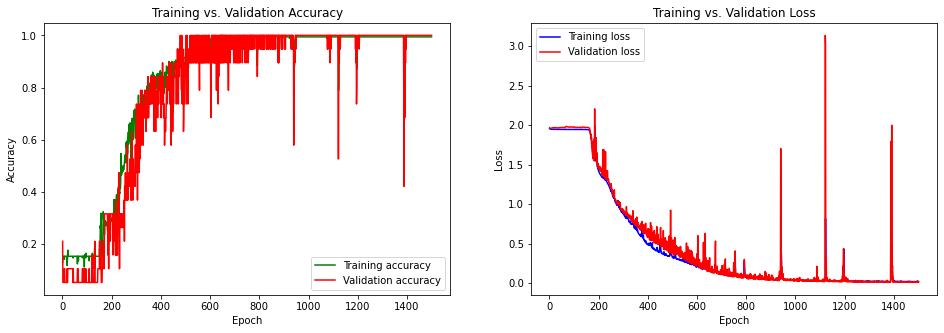

In [104]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
acc_model = new.history['categorical_accuracy']
acc_validaion = new.history['val_categorical_accuracy']
epochs = range(1,len(acc_model)+1)
plt.plot(epochs,acc_model,c='g',label = 'Training accuracy')
plt.plot(epochs,acc_validaion,c='r',label = 'Validation accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
acc_model_loss = new.history['loss']
acc_validaion_loss = new.history['val_loss']
epochs = range(1,len(acc_model_loss)+1)
plt.plot(epochs,acc_model_loss,c='b',label = 'Training loss')
plt.plot(epochs,acc_validaion_loss,c='r',label = 'Validation loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [105]:
model_predict = models_new.predict(X_test)

In [106]:
print(model_predict.shape)
print(y_test.shape)
print(len(model_predict))

(21, 7)
(21, 7)
21


In [107]:
test_new , predict_new = [],[]
for i in range(len(model_predict)):
    test_new.append(actions[np.argmax(y_test[i])])
    predict_new.append(actions[np.argmax(model_predict[i])])
    

In [108]:
test_new

['Sunday',
 'Friday',
 'Saturday',
 'Monday',
 'Monday',
 'Thursday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Friday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Saturday',
 'Thursday',
 'Saturday',
 'Sunday',
 'Tuesday',
 'Wednesday',
 'Friday',
 'Monday']

In [109]:
predict_new

['Sunday',
 'Friday',
 'Saturday',
 'Monday',
 'Monday',
 'Thursday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Friday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Saturday',
 'Thursday',
 'Saturday',
 'Sunday',
 'Tuesday',
 'Wednesday',
 'Friday',
 'Monday']

In [110]:
y_test

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [111]:
print(100*accuracy_score(predict_new,test_new))

100.0


In [112]:
pre=np.reshape(predict_new, (len(predict_new),1))
tst = np.reshape(test_new, (len(test_new),1))
print("      Test Data  Predict Data")
np.array(np.concatenate((pre,tst),axis = 1))

      Test Data  Predict Data


array([['Sunday', 'Sunday'],
       ['Friday', 'Friday'],
       ['Saturday', 'Saturday'],
       ['Monday', 'Monday'],
       ['Monday', 'Monday'],
       ['Thursday', 'Thursday'],
       ['Friday', 'Friday'],
       ['Thursday', 'Thursday'],
       ['Wednesday', 'Wednesday'],
       ['Friday', 'Friday'],
       ['Monday', 'Monday'],
       ['Wednesday', 'Wednesday'],
       ['Tuesday', 'Tuesday'],
       ['Saturday', 'Saturday'],
       ['Thursday', 'Thursday'],
       ['Saturday', 'Saturday'],
       ['Sunday', 'Sunday'],
       ['Tuesday', 'Tuesday'],
       ['Wednesday', 'Wednesday'],
       ['Friday', 'Friday'],
       ['Monday', 'Monday']], dtype='<U9')

# 2nd Model Prediction

In [113]:
actions[np.argmax(predict_new[13])]

'Sunday'

In [114]:
actions[np.argmax(test_new[13])]

'Sunday'

In [115]:
actions[np.argmax(predict_new[6])]

'Sunday'

In [116]:
actions[np.argmax(test_new[1])]

'Sunday'

In [95]:
sequence = []
sentence = []
predictions = []
threshold = 0.5
cap = cv2.VideoCapture(0)
with md_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed
        rst,frame = cap.read()
        
        #Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #Draw Landmarks
        mediapipe_drawing(image,results)
        
        #Prediction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if(len(sequence) == 30):
            res = models_new.predict(np.expand_dims(sequence,axis = 0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    
                    if len(sentence) > 0:
                        if(actions[np.argmax(res)] != sentence[-1]):
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 4:
                sentence = sentence[-4:]                
        cv2.rectangle(image,(0,0),(640,40),(245, 117, 16),-1)
        cv2.putText(image, ' '.join(sentence),(3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1,(66, 245, 149), 2, cv2.LINE_AA)
        
        #Show to Screen
        cv2.imshow("OpenCv Feed", image)
        
        #Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saturday
<class 'me

In [79]:
cap.release()
cv2.destroyAllWindows()